<a href="https://colab.research.google.com/github/rodrigocl90/Proyectos-Series-Temporales/blob/main/apuntes/QQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

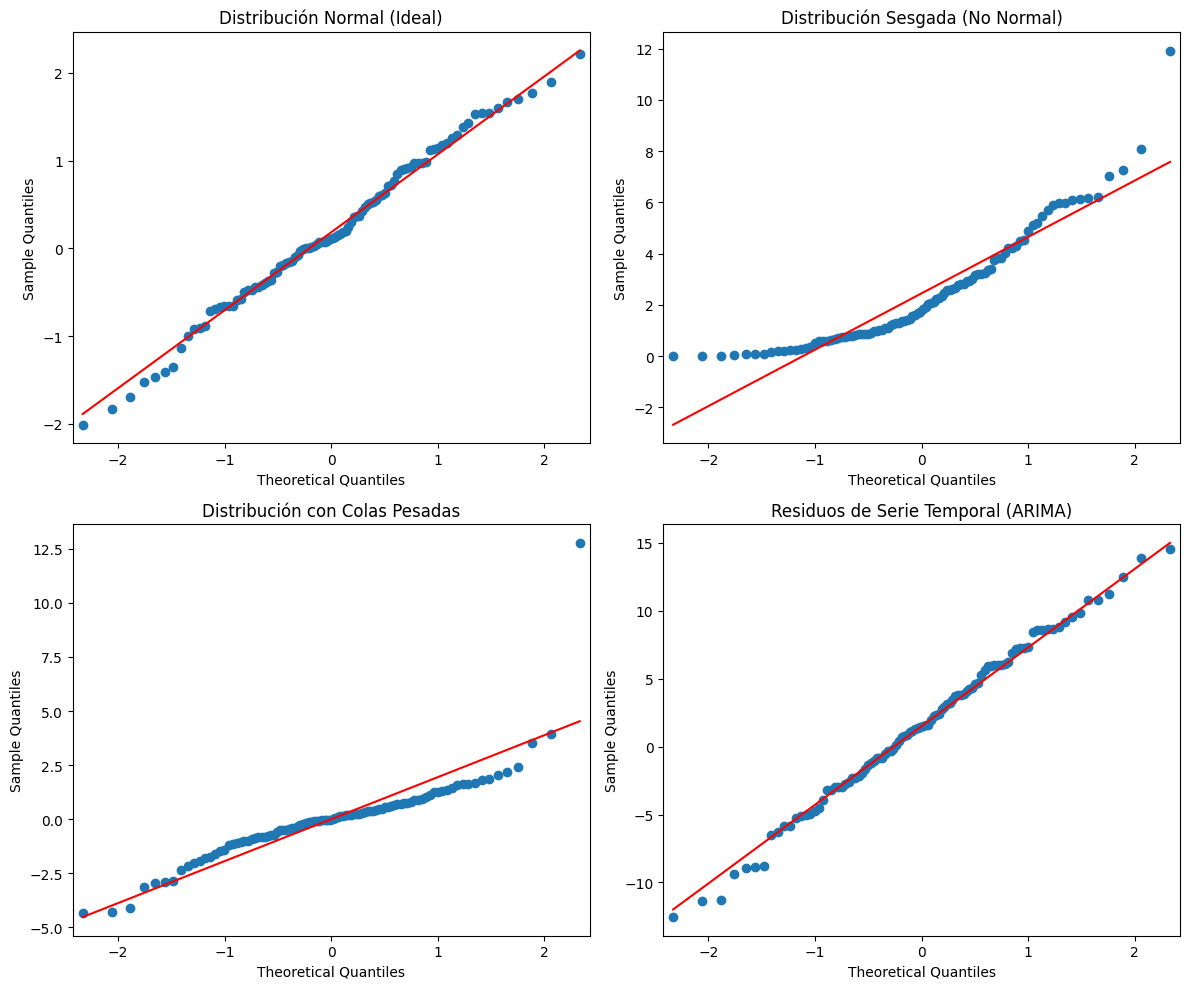

In [1]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Configurar la figura
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Datos con distribución normal (ideal)
data_normal = np.random.normal(loc=0, scale=1, size=100)
sm.qqplot(data_normal, line='s', ax=axes[0, 0])
axes[0, 0].set_title("Distribución Normal (Ideal)")

# 2. Datos con distribución sesgada (exponencial)
data_skewed = np.random.exponential(scale=2, size=100)
sm.qqplot(data_skewed, line='s', ax=axes[0, 1])
axes[0, 1].set_title("Distribución Sesgada (No Normal)")

# 3. Datos con colas pesadas (distribución t de Student con pocos grados de libertad)
data_heavy_tails = np.random.standard_t(df=2, size=100)
sm.qqplot(data_heavy_tails, line='s', ax=axes[1, 0])
axes[1, 0].set_title("Distribución con Colas Pesadas")

# 4. Residuos de una serie temporal con modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Simulación de serie temporal con tendencia
t = np.arange(100)
y = 0.5 * t + np.random.normal(scale=5, size=100)

# Ajuste de modelo ARIMA y obtención de residuos
modelo = ARIMA(y, order=(1,1,1)).fit()
residuos = modelo.resid

# Q-Q Plot de los residuos
sm.qqplot(residuos, line='s', ax=axes[1, 1])
axes[1, 1].set_title("Residuos de Serie Temporal (ARIMA)")

# Mostrar gráficos
plt.tight_layout()
plt.show()
